In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame, GeoSeries
from geopandas.tools import sjoin
%matplotlib inline

In [3]:
suspensions_df = pd.read_csv("cps_suspension_homeroom.csv")
suspensions_df[:25]

,Unnamed: 0,School Year,School ID,School Name,Homeroom,Count of Suspension Events,Dummy Room number to remove names,Original Homeroom
0,0,2010-2011,400018,AUSTIN BUS & ENTRP CONTR HS,A101,*,NaN,A101
1,1,2010-2011,400018,AUSTIN BUS & ENTRP CONTR HS,A102,*,NaN,A102
2,2,2010-2011,400022,CHGO ARTS CONTR HS,A103,*,NaN,A103
3,3,2010-2011,400040,FRAZIER CONTR,A104,*,NaN,A104
4,4,2010-2011,400043,HOPE CONTR ES,A110,*,NaN,A110
5,5,2010-2011,400068,PLATO CONTR,A201,*,NaN,A201
6,6,2010-2011,400091,CHGO ADV CONTR HS,A202,*,NaN,A202
7,7,2010-2011,400095,GARFIELD PARK CONTR,A203,*,NaN,A203
8,8,2010-2011,400095,GARFIELD PARK CONTR,A210,*,NaN,A210
9,9,2010-2011,400095,GARFIELD PARK CONTR,A301,*,NaN,A301


In [4]:
suspensions_df["Count of Suspension Events"] = pd.to_numeric(suspensions_df["Count of Suspension Events"], errors='coerce')
suspensions_df["Count of Suspension Events"].fillna(0, inplace=True)
suspensions_df["Count of Suspension Events"].sort_values(ascending=False)[:20]

32507    3425
32506    2892
32505    2310
32504    2219
32503    1614
32502    1526
32501    1483
32500    1402
32499    1387
32498    1346
32497    1335
32496    1313
32495    1269
32494    1264
32493    1230
32492    1222
32491    1113
32490    1103
32489    1077
32488    1075
Name: Count of Suspension Events, dtype: float64

In [5]:
cps_race_data = pd.read_csv("cps_race_data.csv")
cps_race_data.dtypes

Network                         object
School ID                        int64
Education Units                 object
Total                           object
White No                        object
White Pct                      float64
African American No             object
African American Pct           float64
Asian/Pac Islander No            int64
Asian/Pac Islander Pct         float64
Native American/Alaskan No       int64
Native American/Alaskan Pct    float64
Hispanic No                     object
Hispanic Pct                   float64
Multi-Racial No                  int64
Multi-Racial Pct               float64
Asian No                         int64
Asian Pct                      float64
Hawaiian Pac Islander No         int64
Hawaiian Pac Islander Pct      float64
Na No                            int64
Na Pct                         float64
Unnamed: 22                    float64
Unnamed: 23                    float64
Unnamed: 24                    float64
dtype: object

In [6]:
suspension_race_merge = pd.merge(suspensions_df, cps_race_data, left_on="School ID", right_on="School ID")
suspension_race_merge[:20]

,Unnamed: 0,School Year,School ID,School Name,Homeroom,Count of Suspension Events,Dummy Room number to remove names,Original Homeroom,Network,Education Units,...,Multi-Racial Pct,Asian No,Asian Pct,Hawaiian Pac Islander No,Hawaiian Pac Islander Pct,Na No,Na Pct,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,2010-2011,400018,AUSTIN BUS & ENTRP CONTR HS,A101,0,NaN,A101,Network 3,AUSTIN BUS & ENTRP HS,...,1,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2010-2011,400018,AUSTIN BUS & ENTRP CONTR HS,A102,0,NaN,A102,Network 3,AUSTIN BUS & ENTRP HS,...,1,0,0,0,0,0,0,NaN,NaN,NaN
2,2813,2012-2013,400018,AUSTIN BUS & ENTRP HS,A303,0,NaN,A303,Network 3,AUSTIN BUS & ENTRP HS,...,1,0,0,0,0,0,0,NaN,NaN,NaN
3,5434,2014-2015,400018,AUSTIN BUS & ENTRP HS,NaN,0,NaN,NaN,Network 3,AUSTIN BUS & ENTRP HS,...,1,0,0,0,0,0,0,NaN,NaN,NaN
4,5435,2014-2015,400018,AUSTIN BUS & ENTRP HS,A118,0,NaN,A118,Network 3,AUSTIN BUS & ENTRP HS,...,1,0,0,0,0,0,0,NaN,NaN,NaN
5,6821,2010-2011,400018,AUSTIN BUS & ENTRP CONTR HS,A120,0,NaN,A120,Network 3,AUSTIN BUS & ENTRP HS,...,1,0,0,0,0,0,0,NaN,NaN,NaN
6,6822,2010-2011,400018,AUSTIN BUS & ENTRP CONTR HS,A316,0,NaN,A316,Network 3,AUSTIN BUS & ENTRP HS,...,1,0,0,0,0,0,0,NaN,NaN,NaN
7,6823,2010-2011,400018,AUSTIN BUS & ENTRP CONTR HS,A318,0,NaN,A318,Network 3,AUSTIN BUS & ENTRP HS,...,1,0,0,0,0,0,0,NaN,NaN,NaN
8,6824,2010-2011,400018,AUSTIN BUS & ENTRP CONTR HS,A319,0,NaN,A319,Network 3,AUSTIN BUS & ENTRP HS,...,1,0,0,0,0,0,0,NaN,NaN,NaN
9,11127,2010-2011,400018,AUSTIN BUS & ENTRP CONTR HS,A022,0,NaN,A022,Network 3,AUSTIN BUS & ENTRP HS,...,1,0,0,0,0,0,0,NaN,NaN,NaN


In [7]:
white_pct_desc = suspension_race_merge.sort_values(["White Pct"], ascending=[False])
white_pct_desc["White Pct"][:10]

18805    84
18792    84
18804    84
18803    84
18802    84
18801    84
18800    84
18799    84
18797    84
18796    84
Name: White Pct, dtype: float64

In [8]:
top_suspensions = suspension_race_merge.sort_values(["Count of Suspension Events"], ascending=[False])
top_suspensions[["Count of Suspension Events", "Education Units", "Original Homeroom"]][:20]

,Count of Suspension Events,Education Units,Original Homeroom
2649,3425,FENGER HS,OM Engl
23857,2892,BOWEN HS,Wieting
2288,2310,BOGAN HS,Dworak
23856,2219,BOWEN HS,MG100
23855,1614,BOWEN HS,905
24951,1526,ORR HS,904
2648,1483,FENGER HS,903
2647,1402,FENGER HS,902
4896,1387,MANLEY HS,901
66,1346,AUSTIN BUS & ENTRP HS,808


In [9]:
suspensions_by_school = top_suspensions.groupby(["Education Units"])
suspensions_by_school["Count of Suspension Events"].sum().sort_values(ascending=False)[:25]

Education Units
STEINMETZ HS             13448
ORR HS                   12746
DUNBAR HS                12403
BOWEN HS                 10710
FENGER HS                10047
JULIAN HS                 9552
FARRAGUT HS               8345
HYDE PARK HS              7883
HARLAN HS                 7551
PHILLIPS HS               7539
BOGAN HS                  7289
MARSHALL HS               6628
AUSTIN BUS & ENTRP HS     6458
SENN HS                   6308
MANLEY HS                 6200
KELVYN PARK HS            5365
HIRSCH HS                 4745
WASHINGTON HS             4591
SCHURZ HS                 4493
KENNEDY HS                4333
CHICAGO MILITARY HS       4286
HUBBARD HS                4094
KENWOOD HS                4079
MORGAN PARK HS            4040
CLEMENTE HS               3975
Name: Count of Suspension Events, dtype: float64

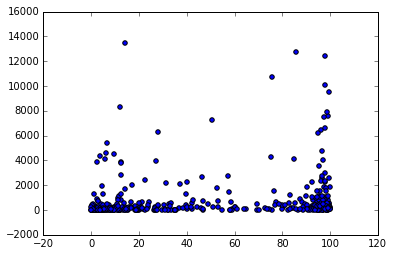

In [10]:
plt.scatter(suspensions_by_school["African American Pct"].mean(), suspensions_by_school["Count of Suspension Events"].sum())

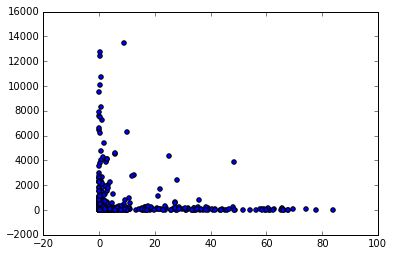

In [11]:
plt.scatter(suspensions_by_school["White Pct"].mean(), suspensions_by_school["Count of Suspension Events"].sum())

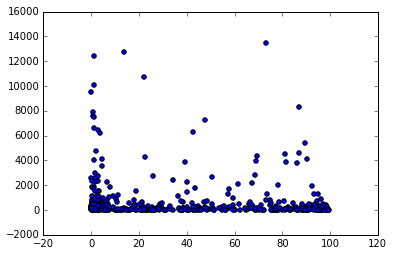

In [12]:
plt.scatter(suspensions_by_school["Hispanic Pct"].mean(), suspensions_by_school["Count of Suspension Events"].sum())

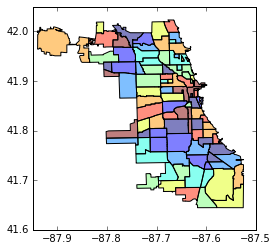

In [23]:
chi_neighborhoods = GeoDataFrame.from_file("neighborhoods/chi_neighborhoods.shp")
cps_schools = GeoDataFrame.from_file("school_locations/cps_schools_1415.shp")
cps_schools["schoolid"] = cps_schools["schoolid"].astype(int)
cps_schools = cps_schools.to_crs(epsg=4326)
chi_neighborhoods = chi_neighborhoods.to_crs(epsg=4326)
chi_neighborhoods.plot()

<class 'geopandas.geodataframe.GeoDataFrame'>


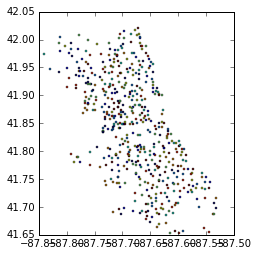

In [36]:
schools_by_suspension = top_suspensions.groupby("School ID")["Count of Suspension Events"].sum()
schools_by_suspension = schools_by_suspension.reset_index()

school_location_suspensions = pd.merge(cps_schools, schools_by_suspension, left_on="schoolid", right_on="School ID")
#school_location_suspensions = school_location_suspensions.to_crs(epsg=4326)
school_location_suspensions.plot()
print type(school_location_suspensions)

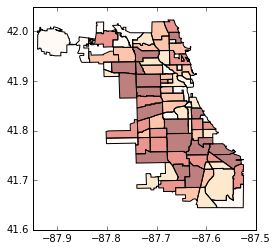

In [47]:
neighborhood_suspensions = sjoin(chi_neighborhoods, school_location_suspensions)
neighborhood_suspension_counts = neighborhood_suspensions.groupby("pri_neigh")["Count of Suspension Events"].sum()
neighborhood_suspension_counts = neighborhood_suspension_counts.reset_index()
neigh_counts = neighborhood_suspension_counts[["pri_neigh","Count of Suspension Events"]]
neighb_suspensions = pd.merge(chi_neighborhoods, neigh_counts, on="pri_neigh")
neighb_suspensions.plot(column='Count of Suspension Events', scheme='QUANTILES', k=5, cmap='OrRd')